In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf
import statsmodels.api as sm

/Applications/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
data = pd.read_csv('../311__Service_Requests.csv')

/Applications/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,CASE_ENQUIRY_ID,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,CASE_STATUS,CLOSURE_REASON,CASE_TITLE,SUBJECT,REASON,...,precinct,land_usage,LOCATION_STREET_NAME,LOCATION_ZIPCODE,Property_Type,Property_ID,LATITUDE,LONGITUDE,Source,Geocoded_Location
0,101000958209,11/01/2013 09:27:19 AM,11/15/2013 09:27:19 AM,11/27/2013 10:15:45 AM,OVERDUE,Closed,Case Closed Case Resolved,Sign Repair,Transportation - Traffic Division,Signs & Signals,...,0308,NaN,INTERSECTION Devonshire St & Summer St,NaN,Intersection,4053.0,42.3537,-71.0580,Constituent Call,"(42.3537, -71.058)"
1,101001243239,01/06/2015 03:26:49 PM,01/21/2015 03:26:00 PM,01/12/2015 10:49:02 PM,ONTIME,Closed,Case Closed Case Resolved replaced LED. jouber...,outage///printed,Public Works Department,Street Lights,...,1404,RL,0 Geneva Ave,2121.0,Address,63245.0,42.3594,-71.0587,Employee Generated,"(0, 0)"
2,101000945083,10/11/2013 09:54:20 AM,NaN,10/28/2013 12:17:45 PM,ONTIME,Closed,Case Closed Survey received.,Metrolist Survey,Civil Rights,Survey,...,NaN,NaN,NaN,NaN,NaN,NaN,42.3594,-71.0587,Employee Generated,"(0, 0)"
3,101000768355,02/10/2013 03:12:43 PM,02/13/2013 08:30:00 AM,02/14/2013 03:40:21 AM,OVERDUE,Closed,Case Closed Case Resolved all roads have been...,Request for Snow Plowing,Public Works Department,Street Cleaning,...,1502,R3,52 Everton St,2121.0,Address,55313.0,42.3042,-71.0716,Constituent Call,"(42.3042, -71.0716)"
4,101001619220,10/23/2015 02:27:00 PM,10/22/2016 02:27:38 PM,07/19/2016 07:56:22 AM,ONTIME,Closed,Case Closed. Closed date : 2016-07-19 07:56:22...,Sidewalk Repair/Concrete/Dist 6,Public Works Department,Highway Maintenance,...,2009,R1,19 Brahms St,2131.0,Address,19291.0,42.2777,-71.1397,City Worker App,"(42.2777, -71.1397)"


In [4]:
data['open_date'] = data['OPEN_DT'].str[:10]
data['open_date'] = pd.to_datetime(data['open_date'], format="%m/%d/%Y")

In [5]:
data['year'] = data['OPEN_DT'].str[6:10].astype(int)
data['month'] = data['OPEN_DT'].str[:2].astype(int)

In [6]:
data.head()

,CASE_ENQUIRY_ID,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,CASE_STATUS,CLOSURE_REASON,CASE_TITLE,SUBJECT,REASON,...,LOCATION_ZIPCODE,Property_Type,Property_ID,LATITUDE,LONGITUDE,Source,Geocoded_Location,open_date,year,month
0,101000958209,11/01/2013 09:27:19 AM,11/15/2013 09:27:19 AM,11/27/2013 10:15:45 AM,OVERDUE,Closed,Case Closed Case Resolved,Sign Repair,Transportation - Traffic Division,Signs & Signals,...,NaN,Intersection,4053.0,42.3537,-71.0580,Constituent Call,"(42.3537, -71.058)",2013-11-01,2013,11
1,101001243239,01/06/2015 03:26:49 PM,01/21/2015 03:26:00 PM,01/12/2015 10:49:02 PM,ONTIME,Closed,Case Closed Case Resolved replaced LED. jouber...,outage///printed,Public Works Department,Street Lights,...,2121.0,Address,63245.0,42.3594,-71.0587,Employee Generated,"(0, 0)",2015-01-06,2015,1
2,101000945083,10/11/2013 09:54:20 AM,NaN,10/28/2013 12:17:45 PM,ONTIME,Closed,Case Closed Survey received.,Metrolist Survey,Civil Rights,Survey,...,NaN,NaN,NaN,42.3594,-71.0587,Employee Generated,"(0, 0)",2013-10-11,2013,10
3,101000768355,02/10/2013 03:12:43 PM,02/13/2013 08:30:00 AM,02/14/2013 03:40:21 AM,OVERDUE,Closed,Case Closed Case Resolved all roads have been...,Request for Snow Plowing,Public Works Department,Street Cleaning,...,2121.0,Address,55313.0,42.3042,-71.0716,Constituent Call,"(42.3042, -71.0716)",2013-02-10,2013,2
4,101001619220,10/23/2015 02:27:00 PM,10/22/2016 02:27:38 PM,07/19/2016 07:56:22 AM,ONTIME,Closed,Case Closed. Closed date : 2016-07-19 07:56:22...,Sidewalk Repair/Concrete/Dist 6,Public Works Department,Highway Maintenance,...,2131.0,Address,19291.0,42.2777,-71.1397,City Worker App,"(42.2777, -71.1397)",2015-10-23,2015,10


In [7]:
data.to_csv('data.csv',index=False)

## Read in new csv file

In [2]:
data = pd.read_csv('../data.csv')

/Applications/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Explore histograms and countplots of variables

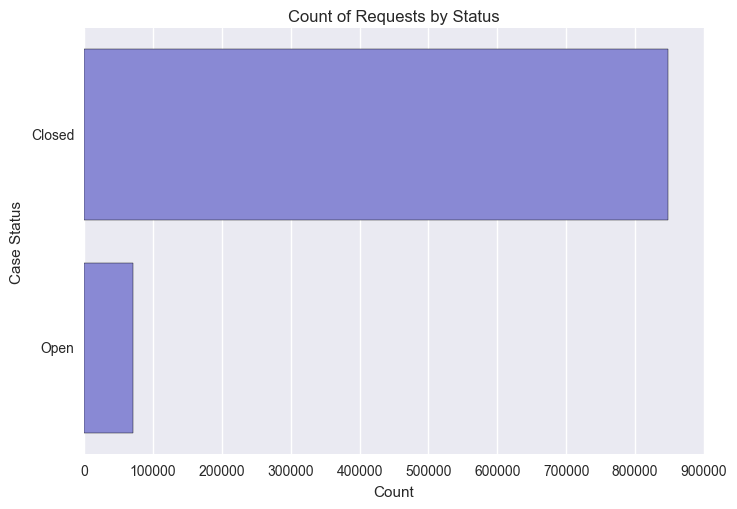

In [18]:
sns.countplot(y='CASE_STATUS', color='#7C7CE0', data=data)
plt.xlabel('Count')
plt.ylabel('Case Status')
plt.title('Count of Requests by Status')

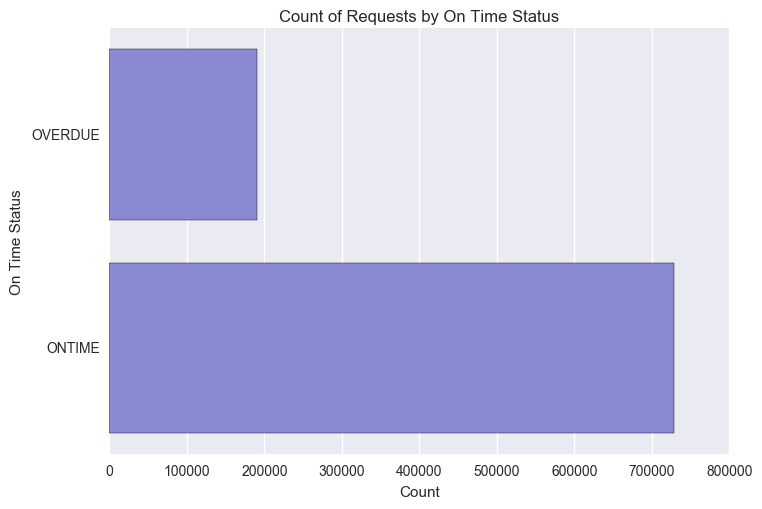

In [19]:
sns.countplot(y='OnTime_Status', color='#7C7CE0', data=data)
plt.xlabel('Count')
plt.ylabel('On Time Status')
plt.title('Count of Requests by On Time Status')

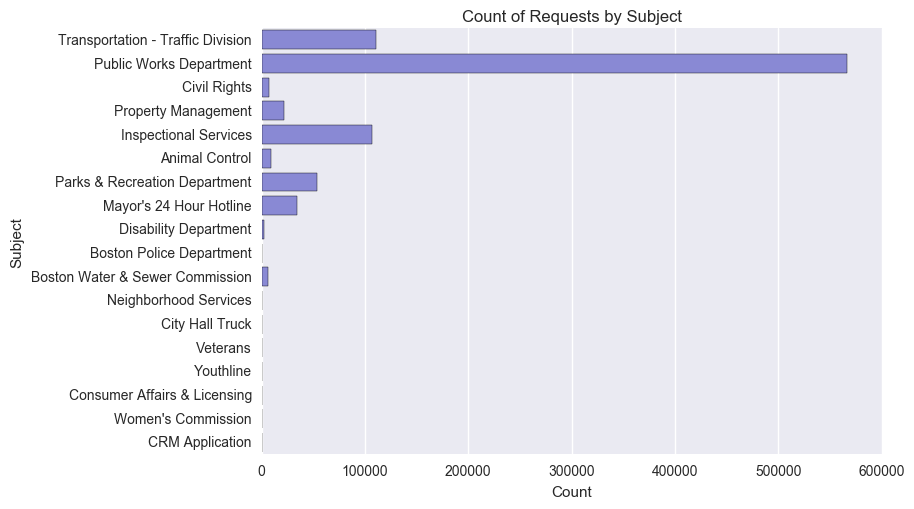

In [20]:
sns.countplot(y='SUBJECT', color='#7C7CE0', data=data)
plt.xlabel('Count')
plt.ylabel('Subject')
plt.title('Count of Requests by Subject')

#### Many values for REASON, TYPE, QUEUE, CASE_TITLE --> look within particular SUBJECTS

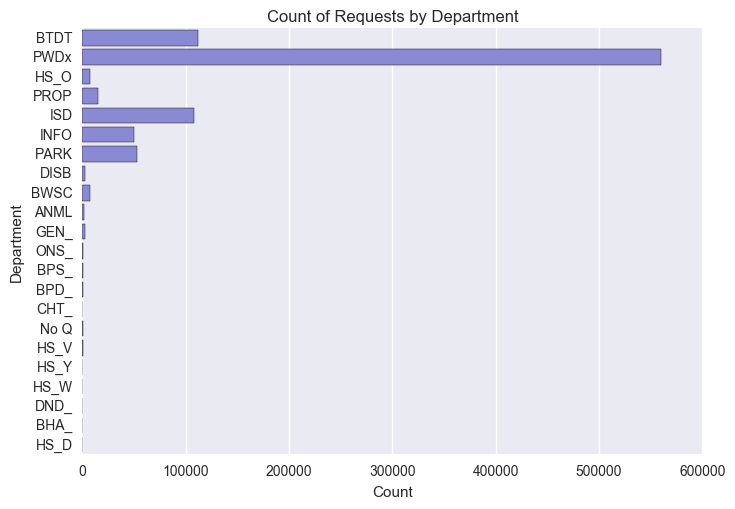

In [21]:
sns.countplot(y='Department', color='#7C7CE0', data=data)
plt.xlabel('Count')
plt.ylabel('Department')
plt.title('Count of Requests by Department')

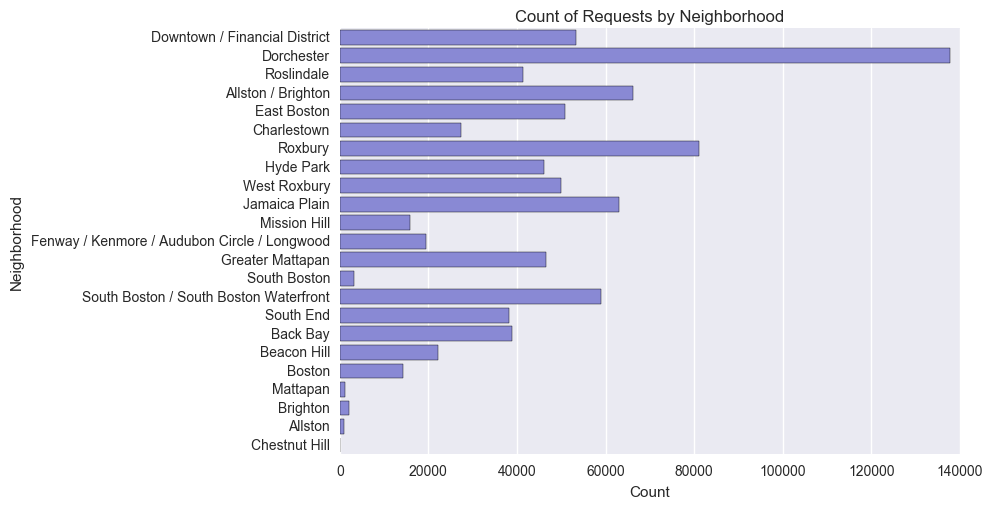

In [22]:
sns.countplot(y='neighborhood', color='#7C7CE0', data=data)
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.title('Count of Requests by Neighborhood')

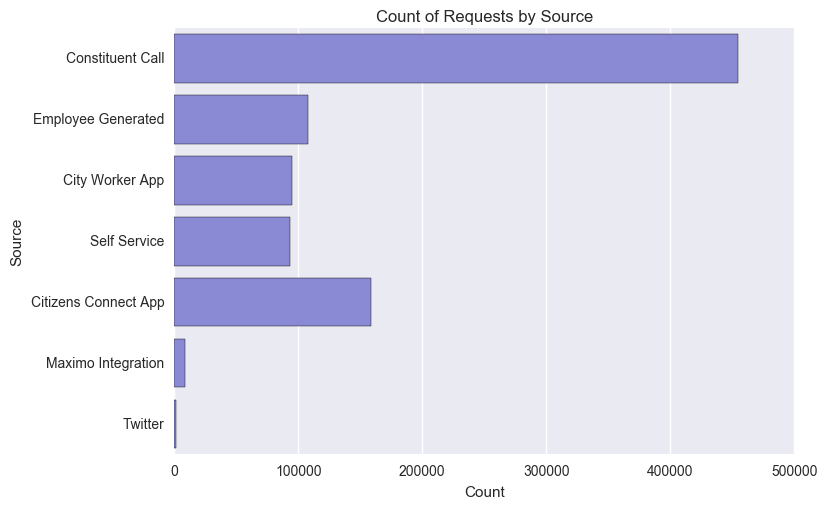

In [23]:
sns.countplot(y='Source', color='#7C7CE0', data=data)
plt.xlabel('Count')
plt.ylabel('Source')
plt.title('Count of Requests by Source')

### Look at subjects (& more detail like reason, etc) per neighborhood. How about source per neighborhood? Create map (ggmap R, maybe even shiny app) to visualize some data. Look at OVERDUE status per subject, neighborhood. Where needs work? If time permits, look into photo links!

In [25]:
year_2016 = data[(data.year == 2016)]

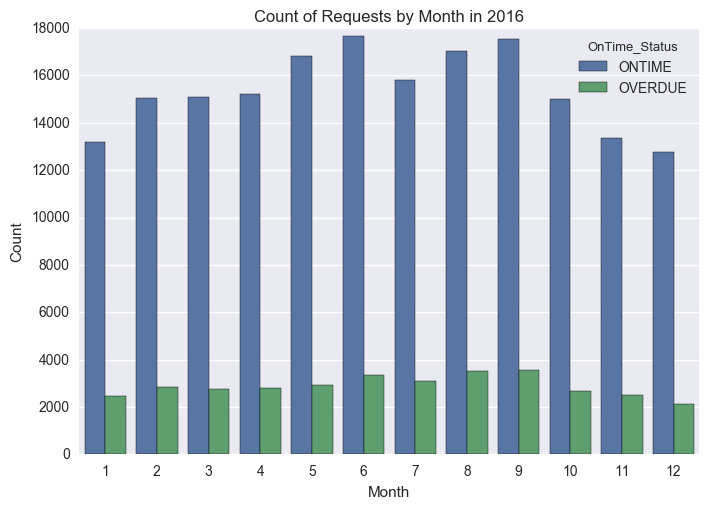

In [27]:
sns.countplot(x="month", hue="OnTime_Status", data=year_2016) 
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Requests by Month in 2016')

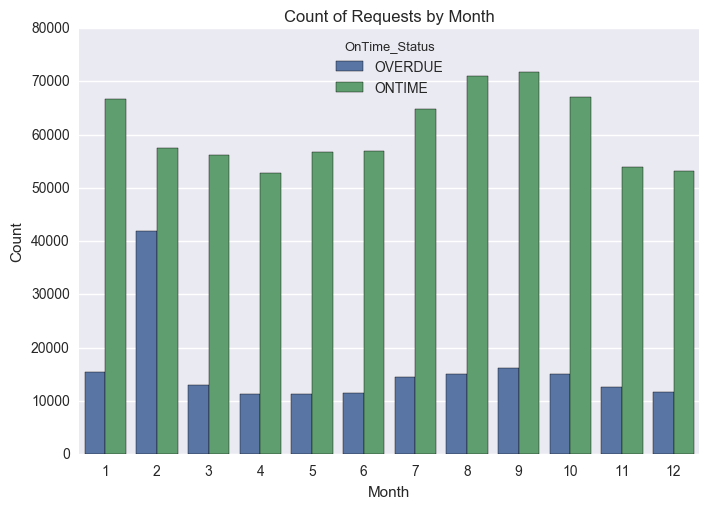

In [28]:
sns.countplot(x="month", hue="OnTime_Status", data=data)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Requests by Month')

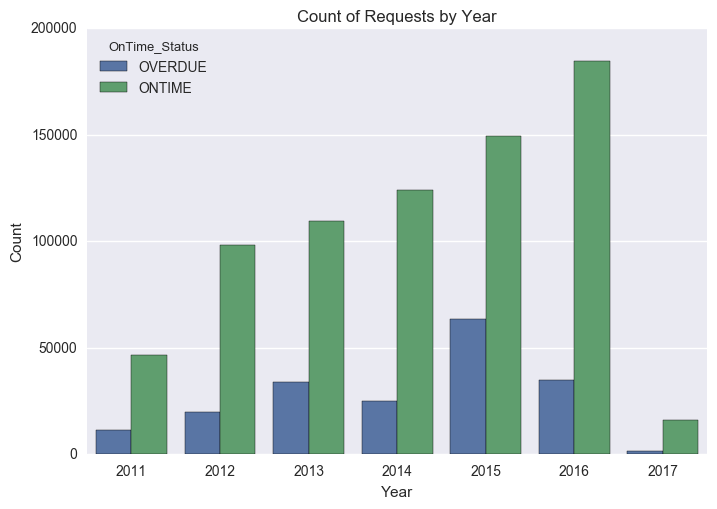

In [29]:
sns.countplot(x="year", hue="OnTime_Status", data=data)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Requests by Year')

In [30]:
year_2015 = data[(data.year == 2015)]

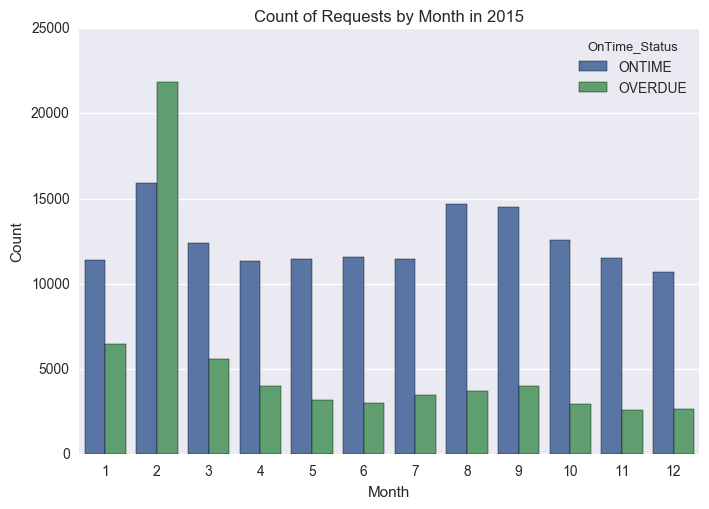

In [31]:
sns.countplot(x="month", hue="OnTime_Status", data=year_2015)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Requests by Month in 2015')

### What happened in Feb of 2015? I turned 22! Ok what else?

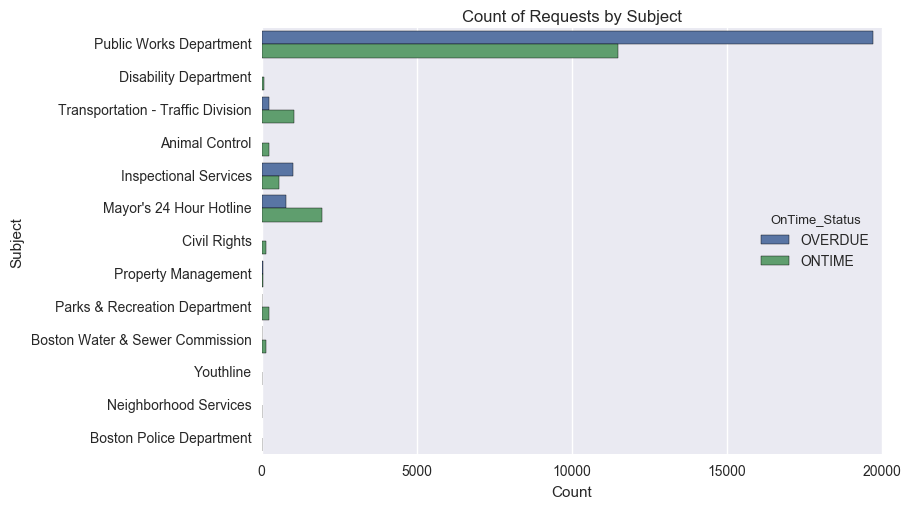

In [32]:
month_2 = year_2015[(year_2015.month == 2)]
sns.countplot(y="SUBJECT", hue="OnTime_Status", data=month_2)
plt.xlabel('Count')
plt.ylabel('Subject')
plt.title('Count of Requests by Subject')

In [17]:
month_2.SUBJECT.unique()

array(['Public Works Department', 'Disability Department',
       'Transportation - Traffic Division', 'Animal Control',
       'Inspectional Services', "Mayor's 24 Hour Hotline", 'Civil Rights',
       'Property Management', 'Parks & Recreation Department',
       'Boston Water & Sewer Commission', 'Youthline',
       'Neighborhood Services', 'Boston Police Department'], dtype=object)

In [7]:
PWD_FEB2015 = month_2[(month_2.SUBJECT == 'Public Works Department')]

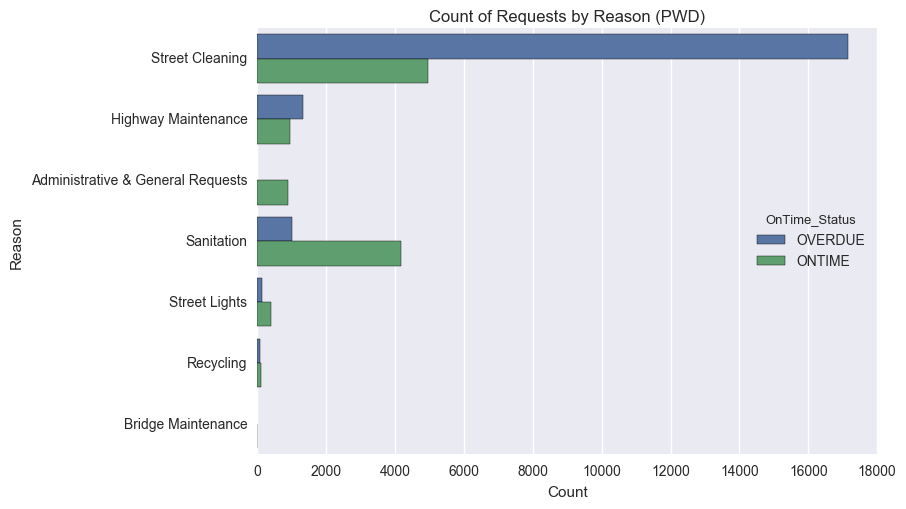

In [33]:
sns.countplot(y="REASON", hue="OnTime_Status", data=PWD_FEB2015)
plt.xlabel('Count')
plt.ylabel('Reason')
plt.title('Count of Requests by Reason (PWD)')

In [12]:
STREET_FEB2015 = PWD_FEB2015[(PWD_FEB2015.REASON == 'Street Cleaning')]

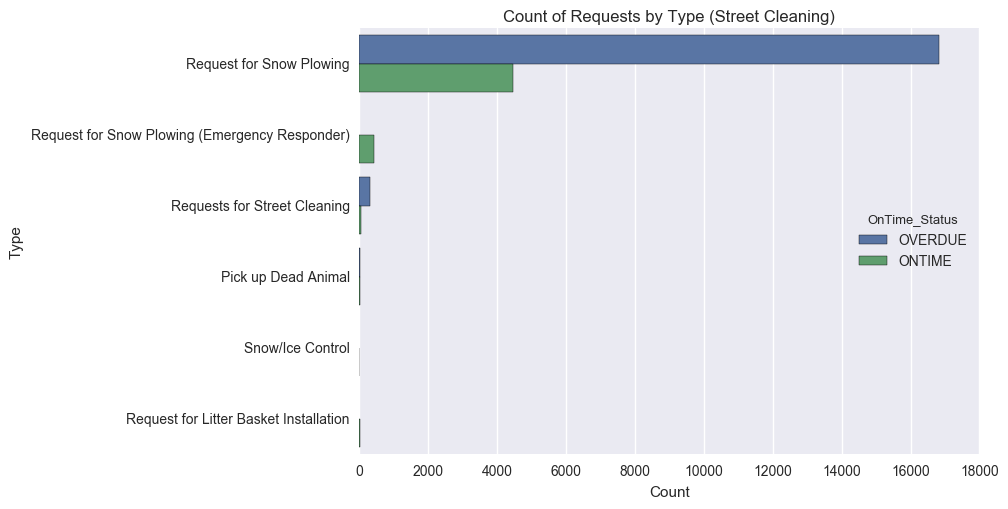

In [34]:
sns.countplot(y="TYPE", hue="OnTime_Status", data=STREET_FEB2015)
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Count of Requests by Type (Street Cleaning)')

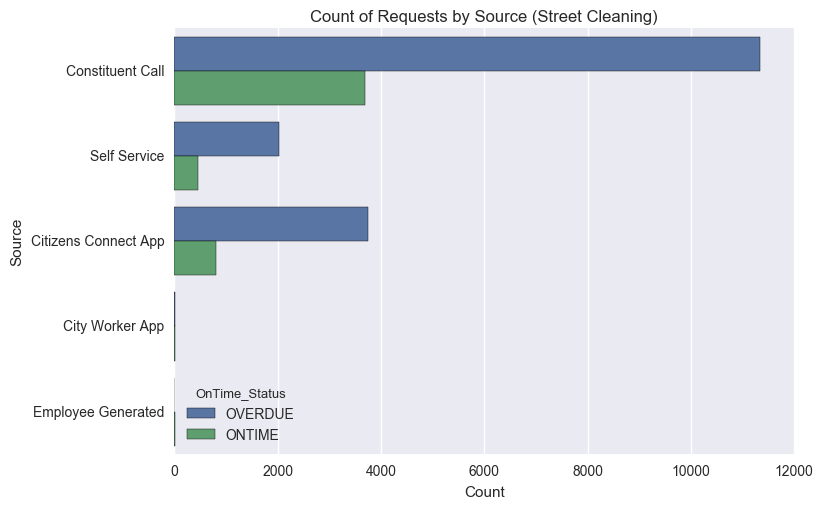

In [35]:
sns.countplot(y="Source", hue="OnTime_Status", data=STREET_FEB2015)
plt.xlabel('Count')
plt.ylabel('Source')
plt.title('Count of Requests by Source (Street Cleaning)')

In [18]:
PWD = data[(data.SUBJECT == 'Public Works Department')]

## Dig into overall PWD data

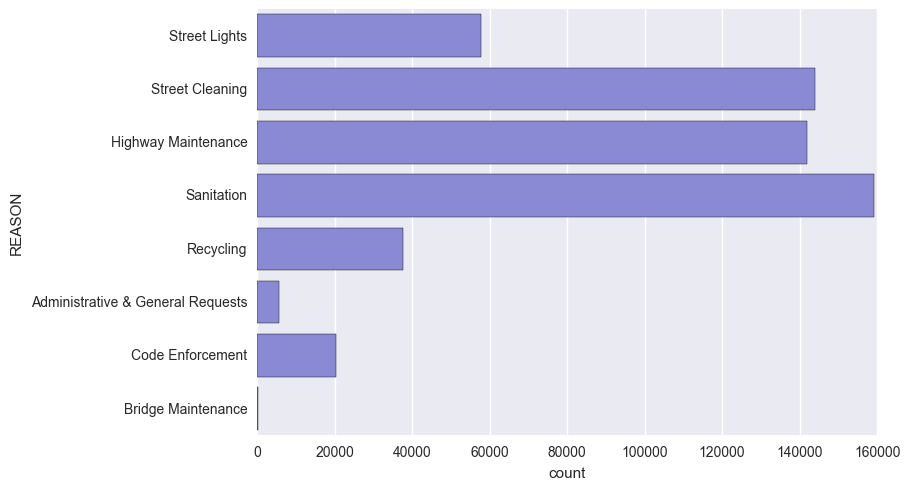

In [19]:
sns.countplot(y='REASON', color='#7C7CE0', data=PWD)

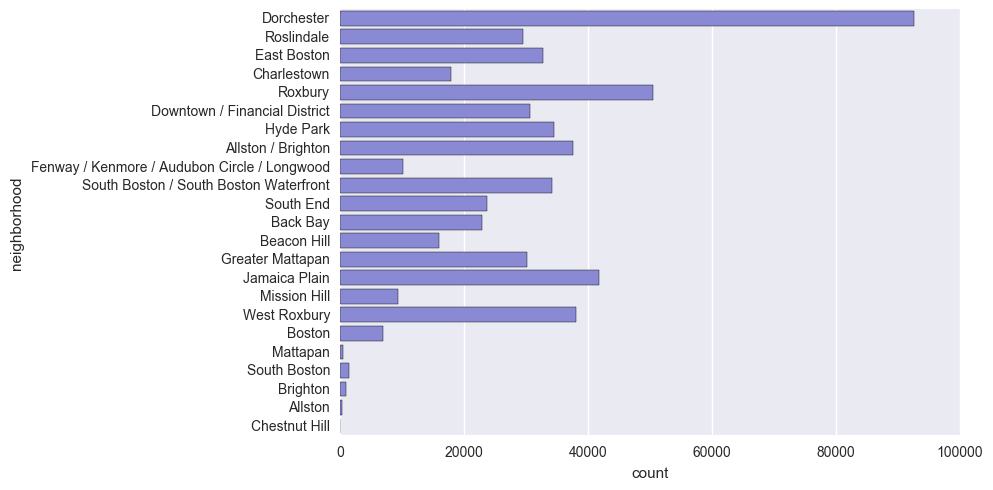

In [23]:
sns.countplot(y='neighborhood', color='#7C7CE0', data=PWD)

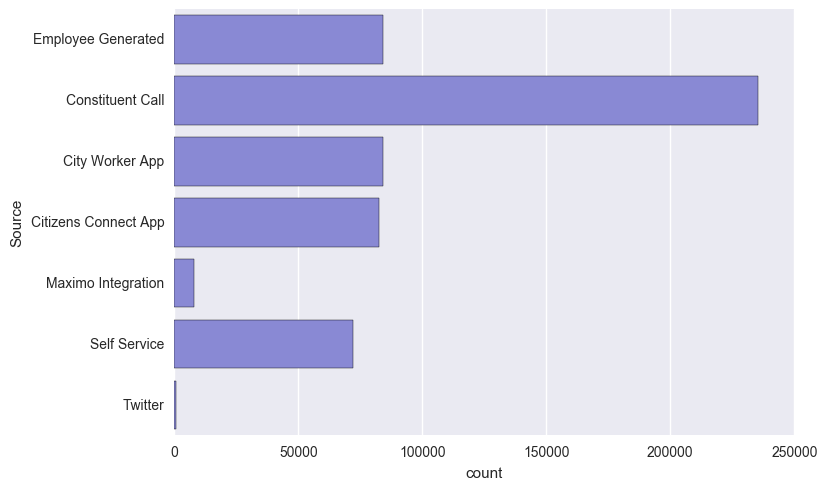

In [24]:
sns.countplot(y='Source', color='#7C7CE0', data=PWD)

# How about more recent needs? How has 2017 started off? What about FA2016?

In [3]:
year_2017 = data[(data.year == 2017)]

In [4]:
year_2017.to_csv('2017_data.csv',index=False)

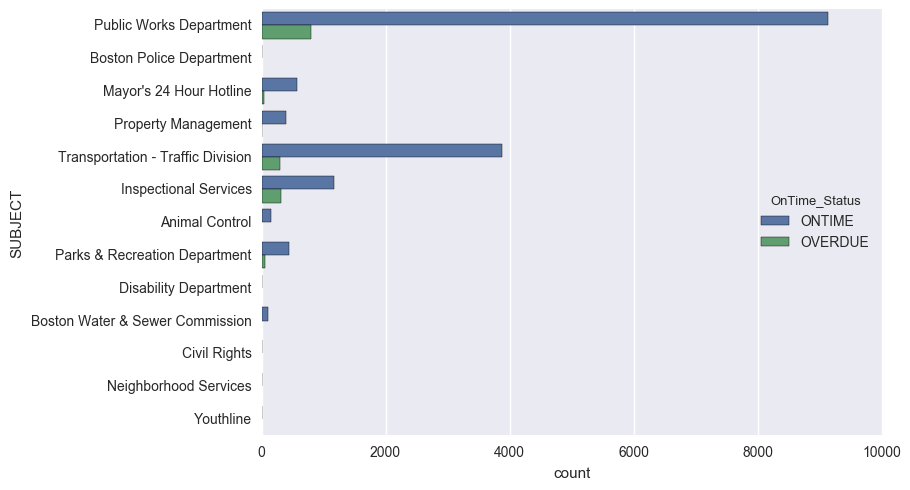

In [28]:
sns.countplot(y="SUBJECT", hue="OnTime_Status", data=year_2017)

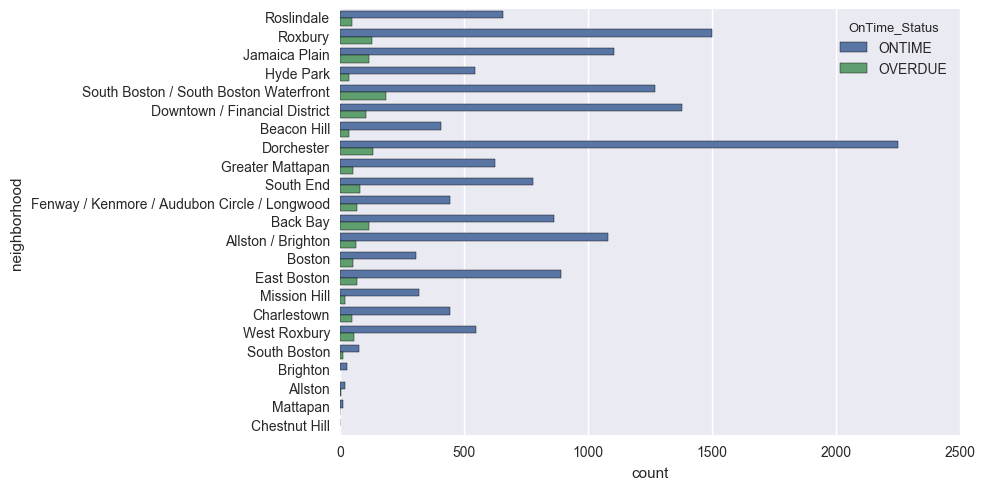

In [29]:
sns.countplot(y="neighborhood", hue="OnTime_Status", data=year_2017)

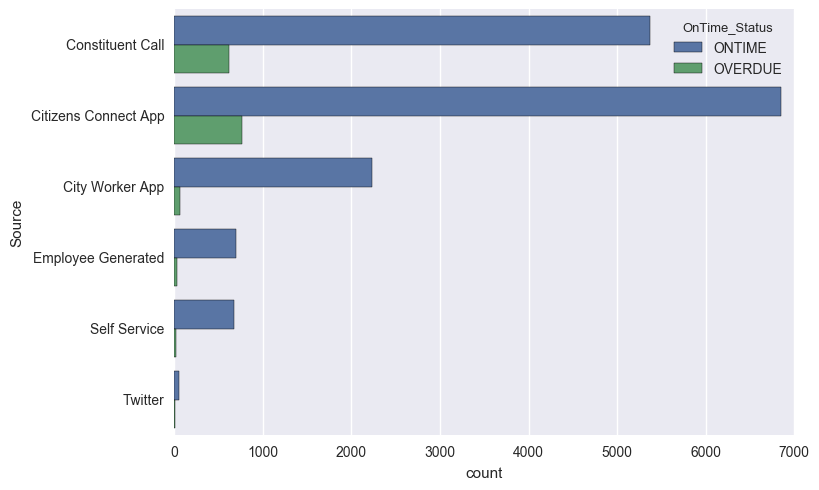

In [31]:
sns.countplot(y="Source", hue="OnTime_Status", data=year_2017)

### How about parking enforcement / neighborhood? All time?

In [3]:
parking_enforcement = data[(data.TYPE == 'Parking Enforcement')]

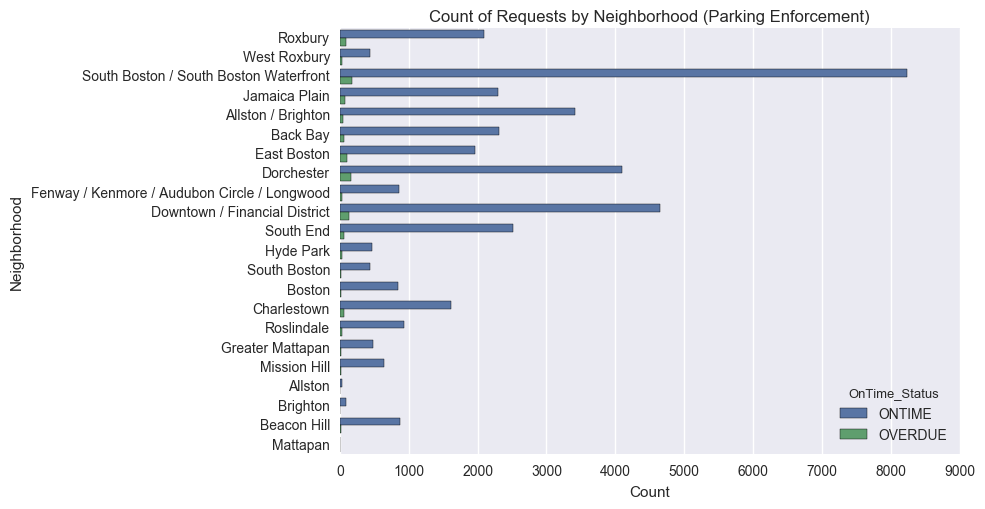

In [36]:
sns.countplot(y="neighborhood", hue="OnTime_Status", data=parking_enforcement)
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.title('Count of Requests by Neighborhood (Parking Enforcement)')